# Palmer Penguins
***

This notebook contains my analysis of the famous Palmer Penguins dataset.

## Imports

There are several modules we'll need to import in order to carry out our analysis.

We're using pandas as the data structure. This will allow us to investigate CSV files.

In [10]:
# Data frames
import pandas as pd

NumPy will allow us to generate arrays and random numbers, while Matplotlib will let us plot our data.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

We'll need to load the Palmer Penguins dataset from a URL.


In [12]:
# Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Examine the data

Now that we've loaded the dataset, we can start examining the data.


In [13]:
# Look at the data set
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Examining the first penguin

We're going to take a look at the characteristics of the first penguin in the list, an Adelie penguin observed on the island of Torgersen.


In [14]:
# Look at the first row
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

### Counting the sexes

There are 344 penguins in the list, so let's see how many of each sex were observed. 


In [15]:
# Count the number of penguins of each sex
df["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

(Note: 11 penguins did not have their sex recorded, hence the number of males and females adding to 333 instead of 344.)

### Describing the set

Let's see some of the averages for the group.


In [16]:
# Describe the data set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


(Note: these figures are slightly skewed since eleven of the penguins in the group didn't have their characteristics recorded beyond species and location, even though they are included in the overall headcount.)

## Modeling the set

### Types of variable

There are a few different types of variables that we can use to model the variables in Python. 

#### Numerical values

Given that bill length and depth, flipper length, and body mass are all numbers, the main options we have for these are integers and floats. Since all of the figures for bill length and depth are decimals, they'll need to be floats instead of integers. Flipper length and body mass are all given as whole numbers which are larger than the figures for the bill measurements, so they could be integers (which can be both larger and more accurate than floats).

However, all of the variables in an array need to be of the same type when using NumPy in calculations, so for this reason it may be better to have all of the numerical values be floats, even those that aren't decimals.


Pandas will allow us to check what types of variable we have in the dataset.

In [17]:
# Inspect the types

df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

As expected, all of the numerical values are floats, while species, island and sex are all listed as objects.

<BarContainer object of 344 artists>

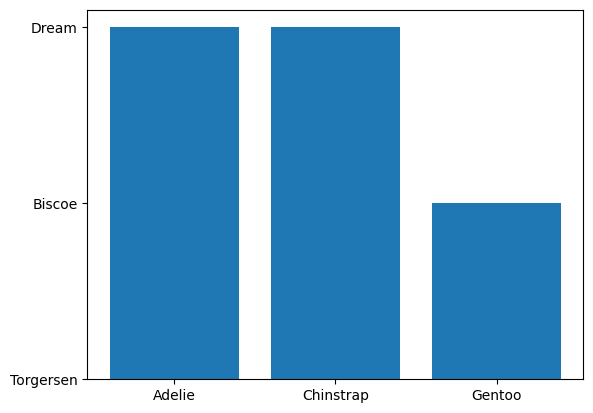

In [18]:
#Count the number of each species

bar_data=pd.DataFrame(df)

x = list(bar_data.iloc[:, 0]) 
y = list(bar_data.iloc[:, 1]) 

plt.bar(x,y)

***
# End